# Exploratory Data Analysis

## 1. General

In [1]:
# import the librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pointbiserialr

In [2]:
# path to the data on the local machine
path = "/Users/maximkiesel/Desktop/Master/Model Engineering/use_case_1/PSP_Jan_Feb_2019.xlsx"

In [3]:
# load the data
data = pd.read_excel(path)

In [4]:
# show the first 5 rows
data.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [5]:
# count rows
len(data)

50410

In [6]:
# datatypes of the data
data.dtypes

Unnamed: 0             int64
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object

In [7]:
# the the number of NaN values in the dataset
data.isna().sum()

Unnamed: 0    0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

In [8]:
data = data.drop('Unnamed: 0', axis=1)

In [9]:
# check the duplicates
duplicates = data[data.duplicated(keep="first")]
print(f"The number of duplicates is: {len(duplicates)}")
duplicates.head(20)

The number of duplicates is: 81


,tmsp,country,amount,success,PSP,3D_secured,card
84,2019-01-01 01:28:02,Germany,37,0,UK_Card,0,Master
496,2019-01-01 09:35:38,Germany,170,0,UK_Card,0,Diners
500,2019-01-01 09:44:27,Germany,113,0,UK_Card,0,Visa
603,2019-01-01 11:32:44,Germany,170,0,UK_Card,0,Visa
1393,2019-01-02 03:06:14,Austria,229,0,UK_Card,0,Master
1444,2019-01-02 04:00:37,Germany,203,0,UK_Card,0,Master
1863,2019-01-02 12:53:12,Germany,216,0,Simplecard,0,Master
3938,2019-01-04 09:08:04,Austria,109,0,UK_Card,0,Master
4052,2019-01-04 11:57:35,Germany,77,0,UK_Card,0,Master
4783,2019-01-05 06:01:47,Germany,291,0,UK_Card,0,Master


In [10]:
# check the number of unique duplicates 
unique_duplicates = duplicates.drop_duplicates()
num_unique_duplicates = len(unique_duplicates)

print(f"The number of unique duplicates is: {num_unique_duplicates}")

The number of unique duplicates is: 81


In [11]:
# Calculate the percentage of duplicates
total_rows = len(data)
num_duplicate_rows = len(duplicates)
percentage_duplicates = (num_duplicate_rows / total_rows) * 100

print(f"The percentage of duplicates in the dataset is: {percentage_duplicates:.2f}%")

The percentage of duplicates in the dataset is: 0.16%


In [12]:
# Remove all duplicates from the dataset
data = data.drop_duplicates()

## 2. Numeric Data

In [9]:
# selecte the numeric columns
data_numeric = data.select_dtypes(include=['int64', 'float64'])

In [10]:
# show the statistic of the data
data_numeric.describe()

,amount,success,3D_secured
count,50410.000000,50410.000000,50410.000000
mean,202.395715,0.202896,0.238266
std,96.274730,0.402160,0.426027
min,6.000000,0.000000,0.000000
25%,133.000000,0.000000,0.000000
50%,201.000000,0.000000,0.000000
75%,269.000000,0.000000,0.000000
max,630.000000,1.000000,1.000000



amount


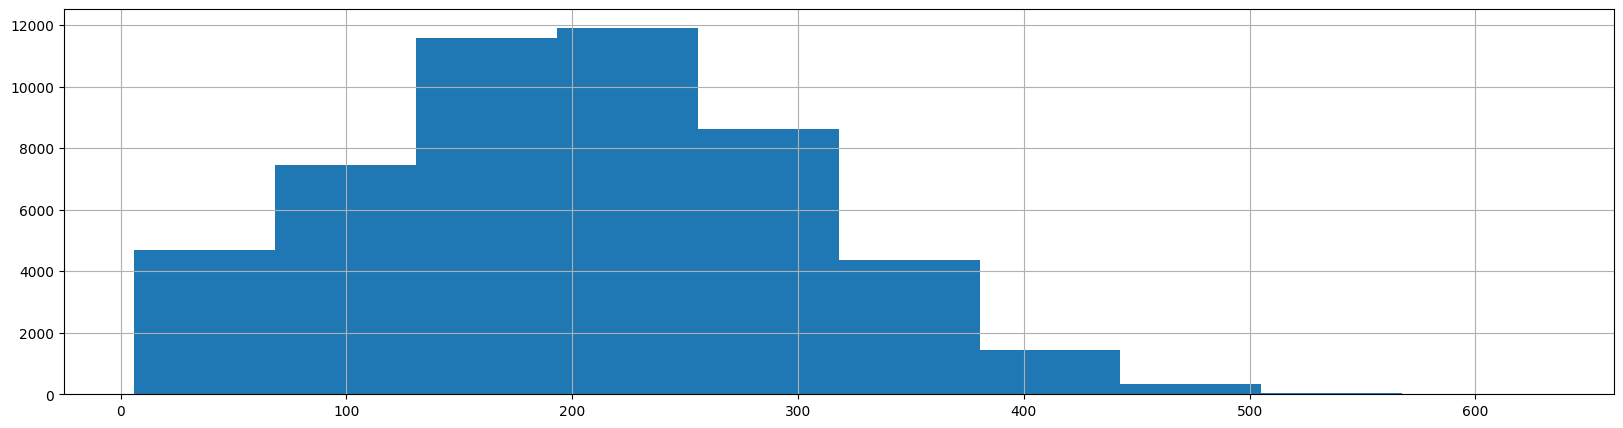

-------------

success


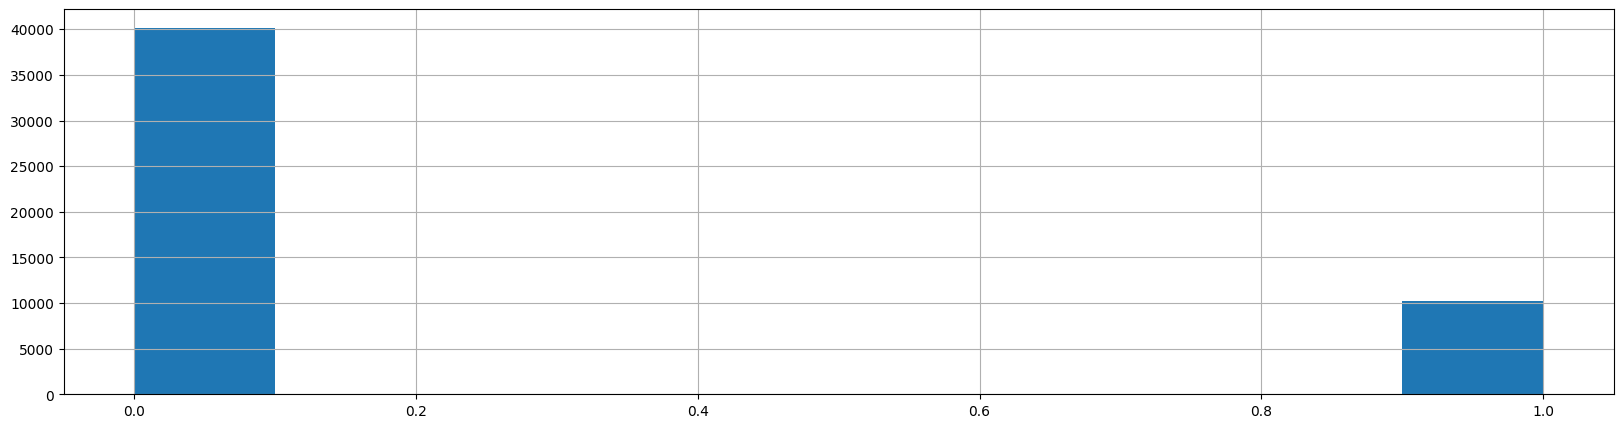

-------------

3D_secured


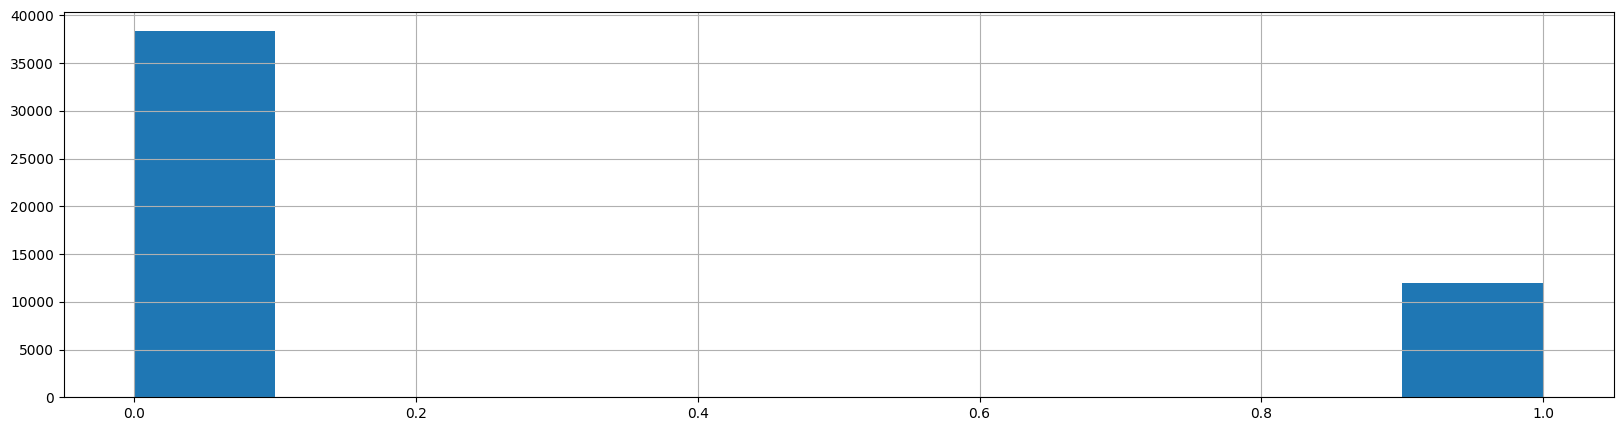

-------------


In [11]:
# plot the histograms of the numeric values
for i in data_numeric:
    print("")
    print(i)
    plt.figure(figsize=(20, 5)) 
    data_numeric[i].hist()
    plt.show()
    print("-------------") 

In [12]:
# failure rate
len(data_numeric[data_numeric["success"] == 0]) / len(data_numeric)

0.7971037492561

In [13]:
# usage 3D-Secure
len(data_numeric[data_numeric["3D_secured"] == 1]) / len(data_numeric)

0.23826621702043246

In [14]:

len(data_numeric[data_numeric["3D_secured"] == 1])

12011

In [15]:
len(data_numeric[data_numeric["success"] == 1])

10228

In [16]:
# sucess rate then using 3D-Secure
len(data_numeric[data_numeric["success"] == 1]) / len(data_numeric[data_numeric["3D_secured"] == 1])

0.8515527433186246

In [17]:
# difference between the means of "amount" for sucess
data_numeric.groupby('success')['amount'].mean()

success
0    206.59345
1    185.90438
Name: amount, dtype: float64

<Figure size 2000x500 with 0 Axes>

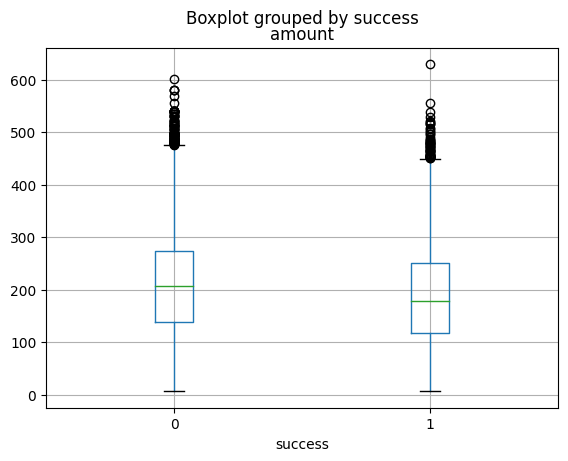

In [18]:
# boxplot visualization for sucess (grouped by) and amount
plt.figure(figsize=(20, 5)) 
data_numeric.boxplot(column='amount', by='success')
plt.show()

In [19]:
# calculate the p-value for the mean of amount grouped by success

# splitting the data
group0 = data_numeric[data_numeric['success'] == 0]['amount']
group1 = data_numeric[data_numeric['success'] == 1]['amount']

# calculate the p value
t_stat, p_value = stats.ttest_ind(group0, group1)

print("p-value:", p_value)

p-value: 3.565922643920039e-84


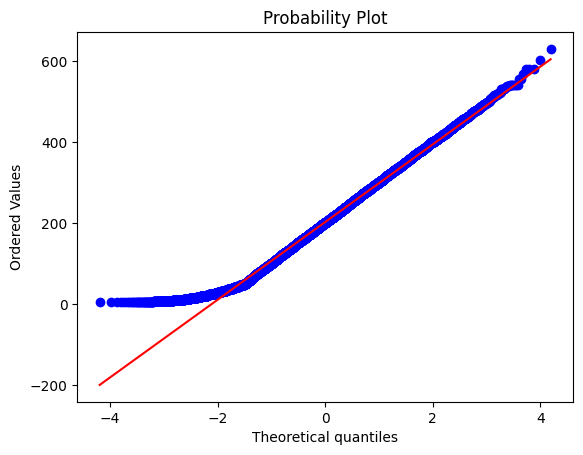

In [20]:
# Q-Q Plot to see if "amount" has a normal distribution
stats.probplot(data_numeric['amount'], plot=plt)
plt.show()

In [21]:
# test if "amount" a normal distribution
w_stat, p_value = stats.shapiro(data_numeric['amount'])
print('p-value:', p_value)

p-value: 2.5223372357846707e-44


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
# calculate the p value to test if "success" and "3D_secured" are independent 
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(data_numeric['success'], data_numeric['3D_secured']))
print("p-value:", p)

p-value: 2.392241166548454e-40


In [23]:
# correlation between "success" and "amount"
point_biserial = data_numeric['success'].corr(data_numeric['amount'])
print("Punkt-biseriale Korrelationskoeffizient:", point_biserial)

Punkt-biseriale Korrelationskoeffizient: -0.08642261369042008


In [24]:
# correlation between "3D_secured" and "amount"
point_biserial = data_numeric['3D_secured'].corr(data_numeric['amount'])
print("Punkt-biseriale Korrelationskoeffizient:", point_biserial)

Punkt-biseriale Korrelationskoeffizient: 0.00017801949789401426


## 3. Categorical Data

In [24]:
# selecte the numeric columns
data_categorical = data.select_dtypes(include=['object'])

In [25]:
# show the amount of different categories in the categorical data
for i in data_categorical:
    print("")
    print(i)
    print("")
    print(data[i].value_counts())
    print("-------------") 


country

Germany        30233
Switzerland    10338
Austria         9839
Name: country, dtype: int64
-------------

PSP

UK_Card       26459
Simplecard    12446
Moneycard      8297
Goldcard       3208
Name: PSP, dtype: int64
-------------

card

Master    29002
Visa      11640
Diners     9768
Name: card, dtype: int64
-------------



country


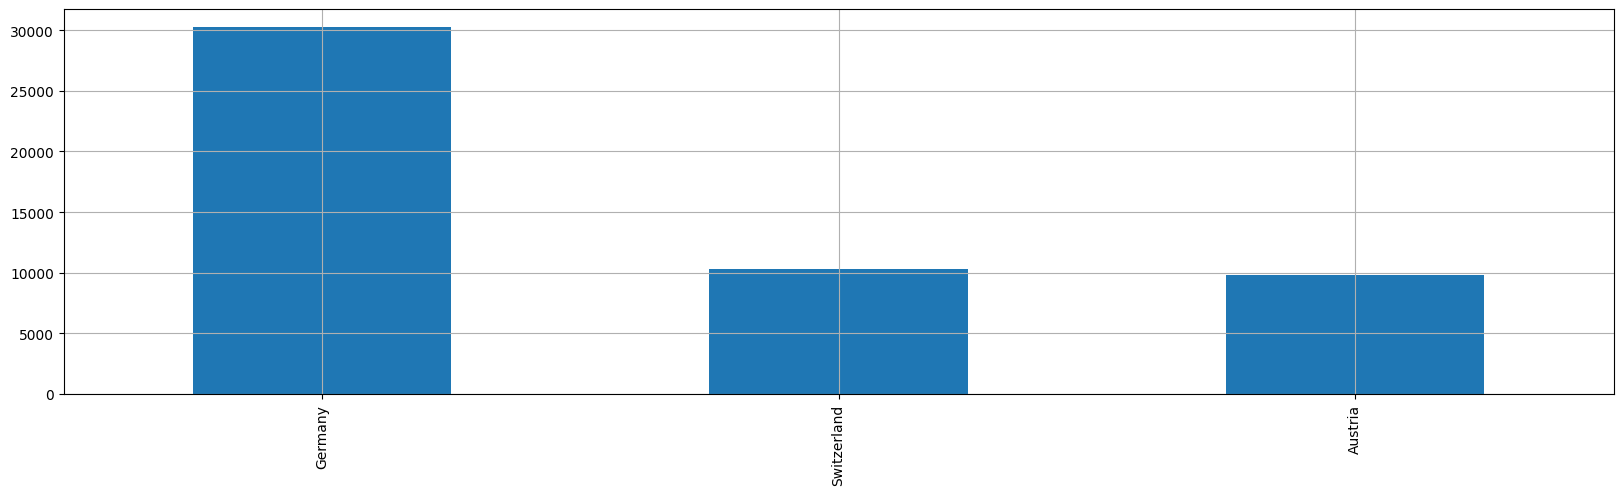

-------------

PSP


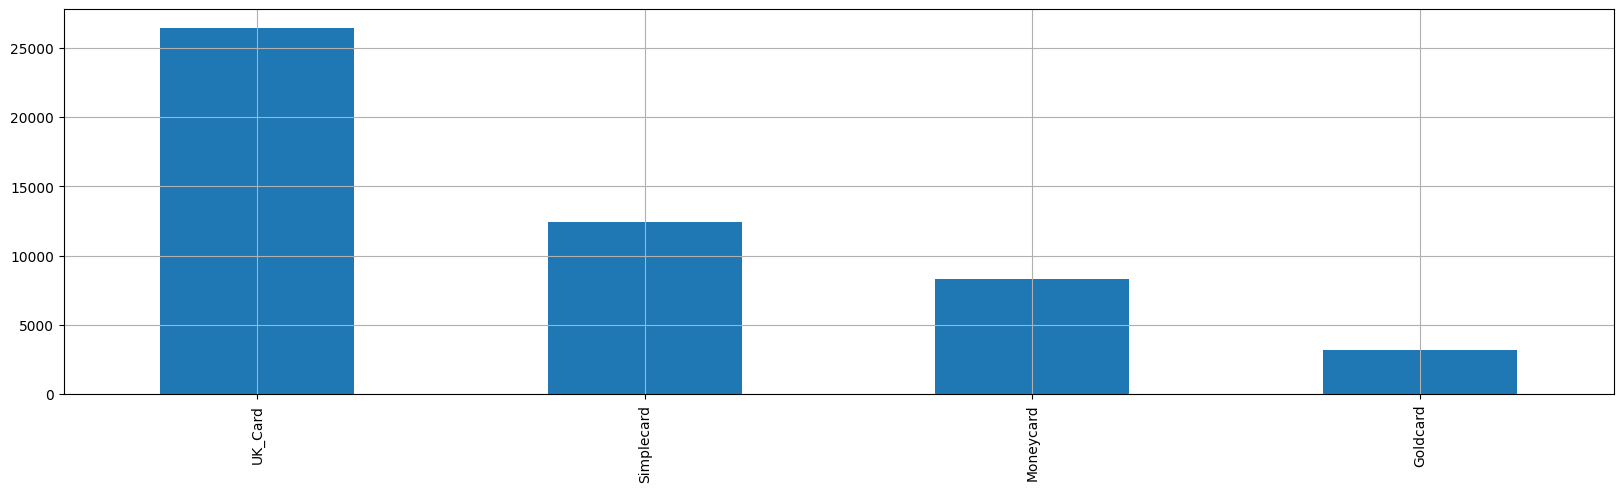

-------------

card


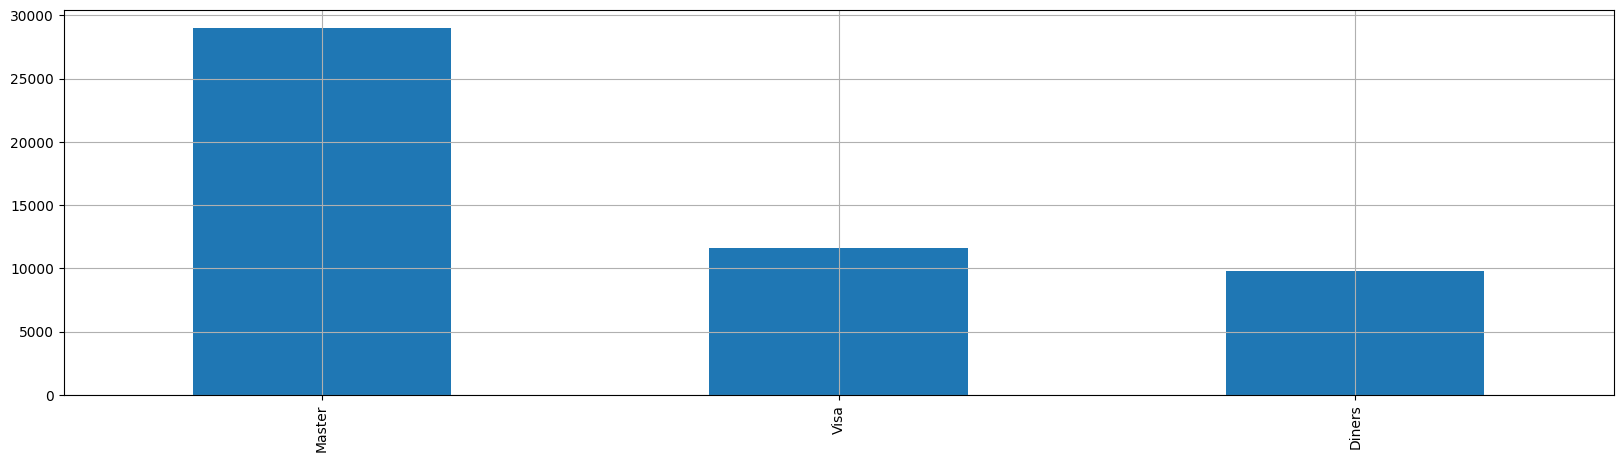

-------------


In [26]:
# visualization of amount different categories
for i in data_categorical:
    print("")
    print(i)
    plt.figure(figsize=(20, 5))
    data_categorical[i].value_counts().plot(kind='bar')
    plt.grid()
    plt.show()
    print("-------------") 

In [27]:
# cross table between categorical data and the target data 
for i in data_categorical:
    print("")
    print(i)
    print("")
    print(pd.crosstab(data_categorical[i], data['success']))
    print("-------------") 


country

success          0     1
country                 
Austria       7826  2013
Germany      24145  6088
Switzerland   8211  2127
-------------

PSP

success         0     1
PSP                    
Goldcard     1905  1303
Moneycard    6482  1815
Simplecard  10478  1968
UK_Card     21317  5142
-------------

card

success      0     1
card                
Diners    7590  2178
Master   23379  5623
Visa      9213  2427
-------------


In [28]:
# calculate the p value to test if "success" and the other categorical variables are independent 
for i  in data_categorical:
    print("")
    print(i)
    print("")
    chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(data['success'], data_categorical[i]))
    print("p-value:", p)
    print("-------------") 


country

p-value: 0.5683037749425706
-------------

PSP

p-value: 3.312365253382584e-216
-------------

card

p-value: 1.144669780335135e-09
-------------



country


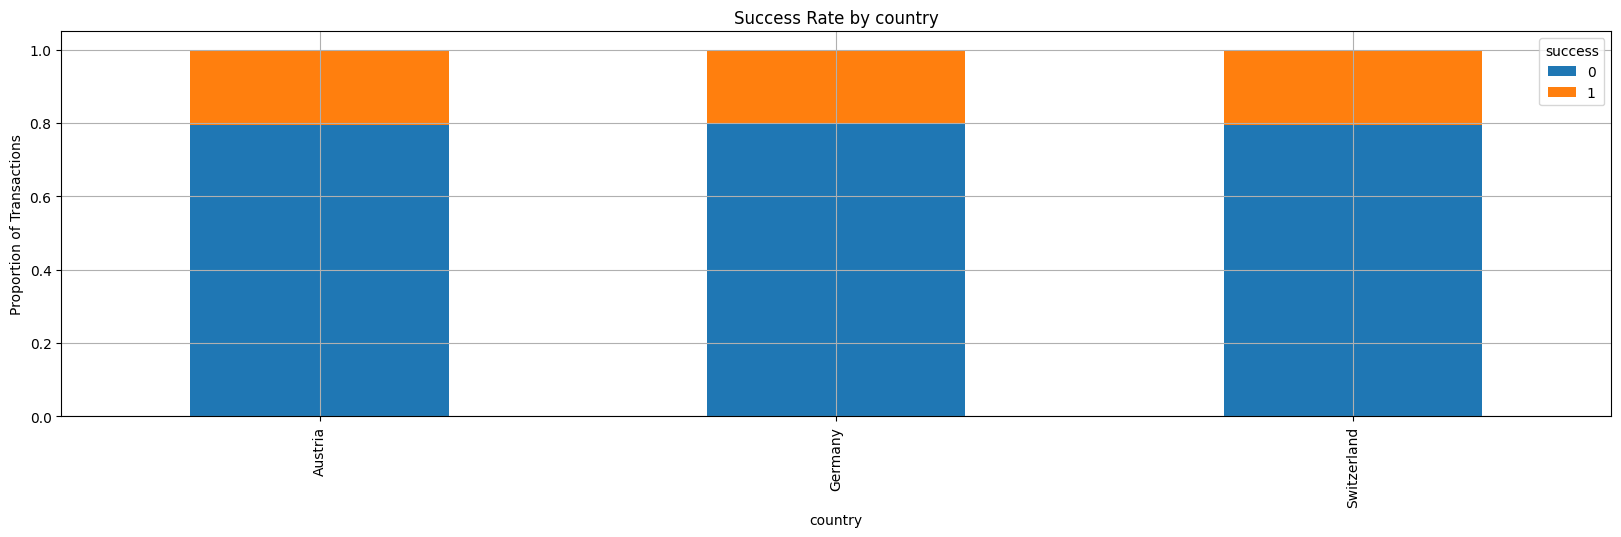

-------------

PSP


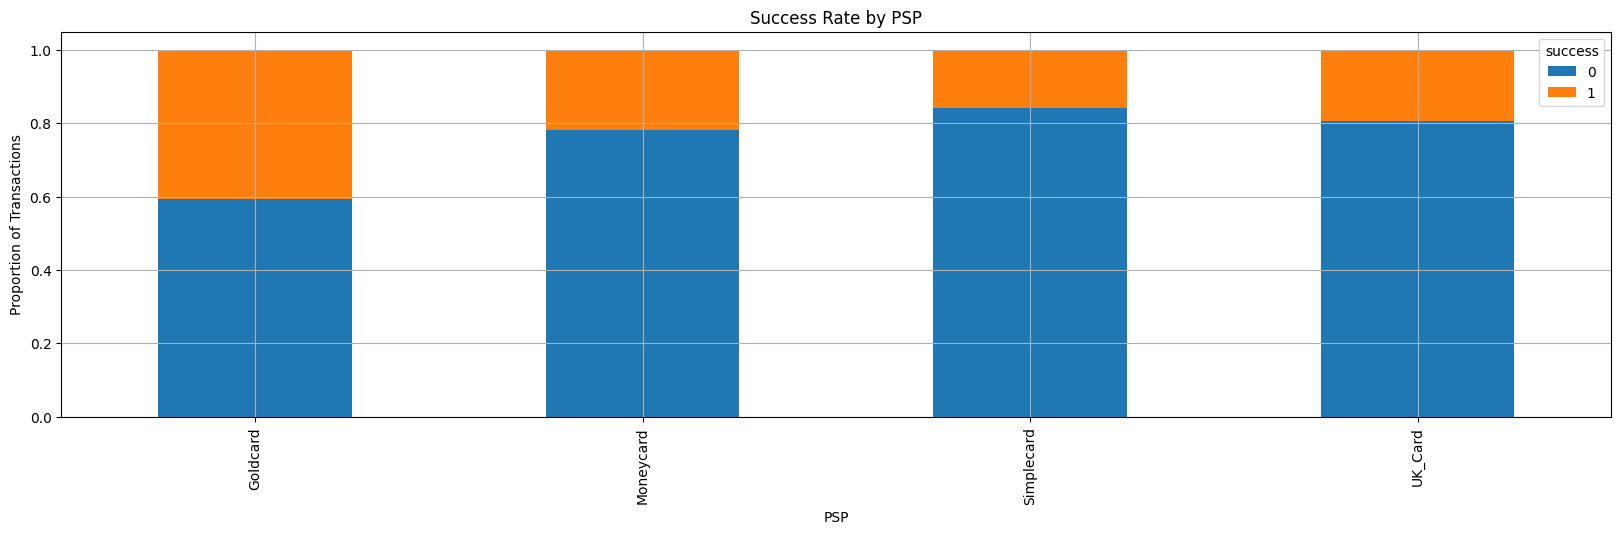

-------------

card


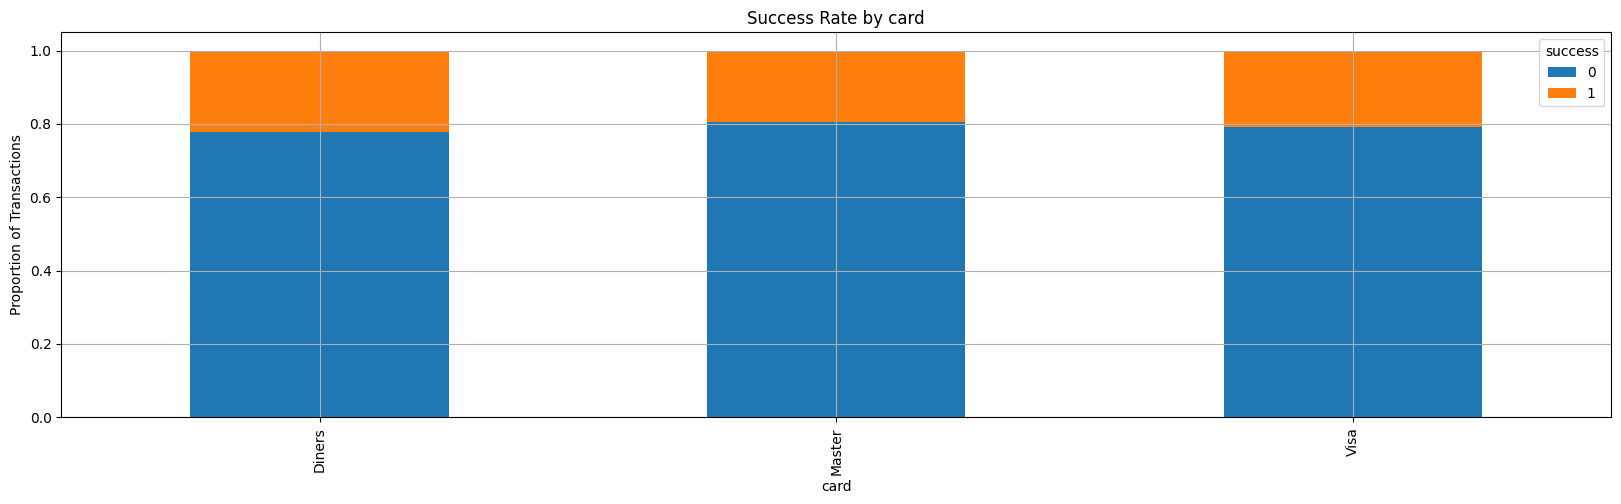

-------------


In [31]:
# visualization between the success groups and the categroical variables
for i in data_categorical:
    print("")
    print(i)
    table = pd.crosstab(data[i], data['success'])
    table = table.div(table.sum(1).astype(float), axis=0)
    table.plot(kind='bar', stacked=True, figsize=(20, 5))  # adjust the size here
    plt.title(f'Success Rate by {i}')
    plt.xlabel(i)  # Changed to 'i' to match the current category
    plt.ylabel('Proportion of Transactions')
    plt.grid()
    plt.show()
    print("-------------")

In [40]:
# Vergleiche jedes Paar von Variablen

categorical_variables = list(data_categorical.columns)

for i in range(len(categorical_variables)):
    for j in range(i+1, len(categorical_variables))
        var1 = categorical_variables[i]
        var2 = categorical_variables[j]
        
        # Erstelle eine Kreuztabelle
        table = pd.crosstab(data_categorical[var1], data_categorical[var2])
        
        # Führe den Chi-Quadrat-Test durch
        chi2, p, dof, expected = chi2_contingency(table)
        
        print(f"\nVariablen: {var1} und {var2}")
        print(f"Chi-Quadrat-Wert: {chi2}")
        print(f"p-Wert: {p}")
        print("-------------")


Variablen: country und PSP
Chi-Quadrat-Wert: 7.259988555280152
p-Wert: 0.29747148868269885
-------------

Variablen: country und card
Chi-Quadrat-Wert: 10.254639269482068
p-Wert: 0.03634995786578327
-------------

Variablen: PSP und card
Chi-Quadrat-Wert: 16.04005658272315
p-Wert: 0.013540575127843202
-------------


In [50]:
# calculate the p value to test if "3D_secured" and "country" are independent 
table = pd.crosstab(data['3D_secured'], data['country'])
chi2, p, dof, expected = chi2_contingency(table)

print(f"p-Wert: {p}")

p-Wert: 0.1215757816317695


In [44]:
# Eta-squared value for the dependency of "amount" and "country"
# ANOVA
model = ols('amount ~ C(country)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Eta squared
esq_sm = anova_table['sum_sq'][0] / (anova_table['sum_sq'][0] + anova_table['sum_sq'][1])
print(f"Eta-squared: {esq_sm:.6f}")

Eta-squared: 0.000035
